In [1]:
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.storagelevel import StorageLevel

%matplotlib inline

In [2]:
iris = pd.read_csv('data/iris.data')
iris.head(5)

,sepal_length_cm,sepal width_cm,petal_length_cm,petal_width_cm,iris_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

# Logistic Regression

In [4]:
measure_cols = ['sepal_length_cm','sepal width_cm','petal_length_cm','petal_width_cm']
x = iris[measure_cols]
y = iris.iris_Class

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [7]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(33.0, 0.5, 'Etiqueta de predicción')

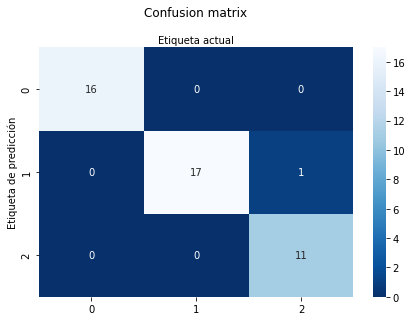

In [9]:
class_names = [0, 1] # Valores a mostrar
fig, ax = plt.subplots() # Dibujamos la gráfica
tick_marks = np.arange(len(class_names)) # Muestra la información en la gráfica 
plt.xticks(tick_marks, class_names) # Dibuja en X
plt.yticks(tick_marks, class_names) # Diguja en Y
# La matriz de confusión se muestra con un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.xlabel('Etiqueta actual')
plt.ylabel('Etiqueta de predicción')

In [10]:
print("Accuracy ", metrics.accuracy_score(y_test, y_pred))

Accuracy  0.9777777777777777


# Logistic Regression